In [1]:
import os
import tensorflow as tf


In [2]:
os.path.join('data','happy')

'data\\happy'

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')   # GPU - 0 , CPU - 1
gpus

[]

In [9]:
# To limit the tensorflow RAM consumption 
# Avoid OOM (OUT OF MEMORY) Errors GPU memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### **download all images** extension download all img at google search
* Also vectors and small img will be downloaded del that

In [11]:
import cv2
import imghdr
data_dir = "data"
image_exts = ['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [14]:
os.listdir(os.path.join(data_dir,'happy'))

['-against-blue-studio-background-human-emotions-positivity-concept_95891-4187.jpg',
 '-happy-people-think-we-re-insane-if-they-only-knew-i-guess-this-is-my-way-of.jpg',
 '-smiling-brightly-looking-camera-with-excited-joyful-expression_176420-12985.jpg',
 '.akhsjdahshdhajsdhaj.JPG.jpg',
 '097b65b439af43a2ab7327040ae3c786.jpeg',
 '1000_F_479289894_BNfeqvgcnWTYjwlRtDCirREl5dT0IewF.jpg',
 '1200px-SNice.svg.png',
 '17688V6DpodT7JK5RJag7-w2x.jpeg',
 '1795208-Girl-smiling-happy-todler-young-smile-happiness.jpg',
 '1950s-1960s-woman-brunette-smiling-laughing-mouth-open-wide-happy-M656XR.jpg',
 '20-24-years-adults-only-blonde-catalogue-2-color-image-face-friendly-F4B24P.jpg',
 '227173-Lady-wearing-glasses_blog_lg.jpg',
 '2849346-remember-theres-only-one-of-you-fit_400_400.jpg',
 '292115365.jpg',
 '313620493.jpg',
 '318920695.jpg',
 '51-513717_happy-girl-happy-person-face-png.png',
 '52987777.jpg',
 '60.jpg',
 '64e62d52-4b3c.webp',
 '662636-Gaucho-Person-happy-smiling-man-argentina-male.jpg',
 

In [18]:
# iterating through each and every photo in happy and sad folder 
# checking its extension is in ext list or not , if not then remove it
for img_category in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,img_category)):
        image_path = os.path.join(data_dir,img_category,img)     
        try:
            img = cv2.imread(image_path)    # loads photo into arrays of pixels
            tip = imghdr.what(image_path)   # gives extension of photo
            if tip not in image_exts:
                print(f"image not in ext list {image_path}")
                os.remove(image_path)       # deleting img
        except Exception as e:
            print(f"Issue with image {image_path}")


In [21]:
# tf.data.Dataset?? --> documentation
tf.data.Dataset.list_files()

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

In [104]:
# we dont need to label tha data -> resize img byDefault (256,256) ,  preproccess our data - PIPELINE
# tf.keras.utils.image_dataset_from_directory??
data = tf.keras.utils.image_dataset_from_directory('data')  
data

Found 263 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [105]:
data_iterator = data.as_numpy_iterator()
data_iterator   # let us access the genrator 

In [106]:
batch = data_iterator.next()
print("Array of  datas ",batch)           # array of data
print("Length of data folder",len(batch))      


Array of  datas  (array([[[[ 24.       ,  14.       ,  13.       ],
         [ 24.       ,  14.       ,  13.       ],
         [ 24.       ,  14.       ,  13.       ],
         ...,
         [255.       , 190.74219  , 140.22656  ],
         [255.       , 190.88867  , 135.33398  ],
         [255.       , 191.       , 135.       ]],

        [[ 23.427734 ,  13.427734 ,  12.427734 ],
         [ 23.427734 ,  13.427734 ,  12.427734 ],
         [ 23.427734 ,  13.427734 ,  12.427734 ],
         ...,
         [255.       , 190.74219  , 140.22656  ],
         [255.       , 190.88867  , 135.33398  ],
         [255.       , 191.       , 135.       ]],

        [[ 22.71289  ,  12.712891 ,  11.712891 ],
         [ 22.71289  ,  12.712891 ,  11.712891 ],
         [ 22.71289  ,  12.712891 ,  11.712891 ],
         ...,
         [255.       , 190.45508  , 139.93945  ],
         [255.       , 190.60156  , 135.04688  ],
         [255.       , 190.71289  , 134.71289  ]],

        ...,

        [[ 46.71289 

In [107]:
batch[0] # photos -- array
batch[0].shape   # batch of 32 images with shape of (256 X 256 X 3)

(32, 256, 256, 3)

In [108]:
batch[1]   #labels

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

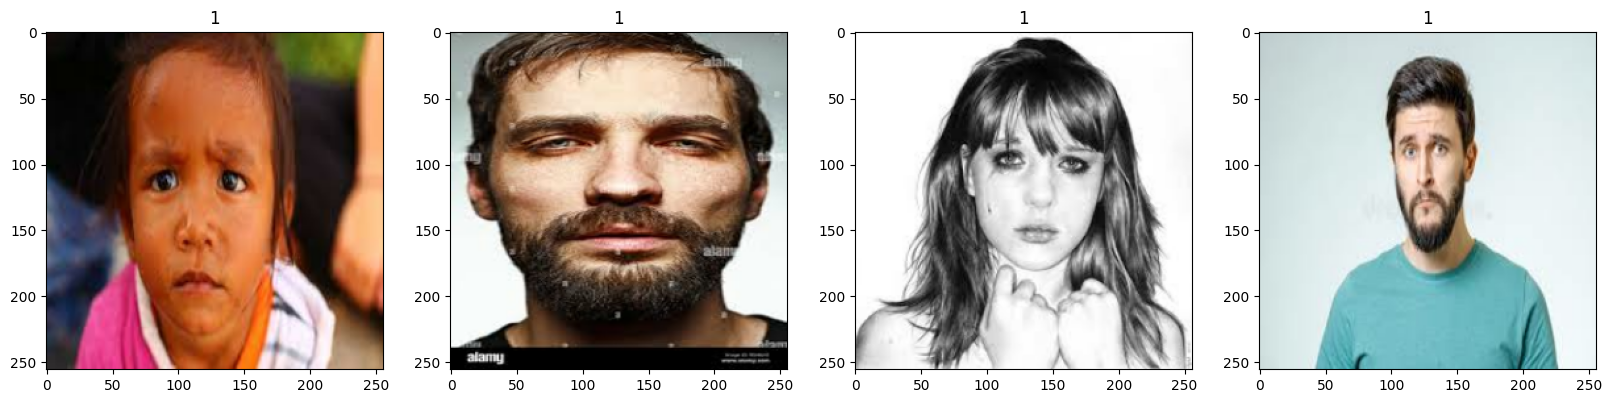

In [109]:
# data is been labels by keras pipeline how do we get know which number is for SAD & HAPPY
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):   # index , images
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [110]:
#  so now we know 0-happy and 1-sad
# get  another batch from iterator
new_batch=data_iterator.next()    # on every execution it picks next batch (32) of data
new_batch
new_batch[0].shape


(32, 256, 256, 3)

In [111]:
new_batch[1]

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [112]:
print('Max Intensity',new_batch[0].max())

Max Intensity 255.0


In [113]:
data = data.map(lambda x,y: (x/255,y))   # dividing whole aray by 255 batch normalization  , values will be floating point

In [114]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].max()

1.0

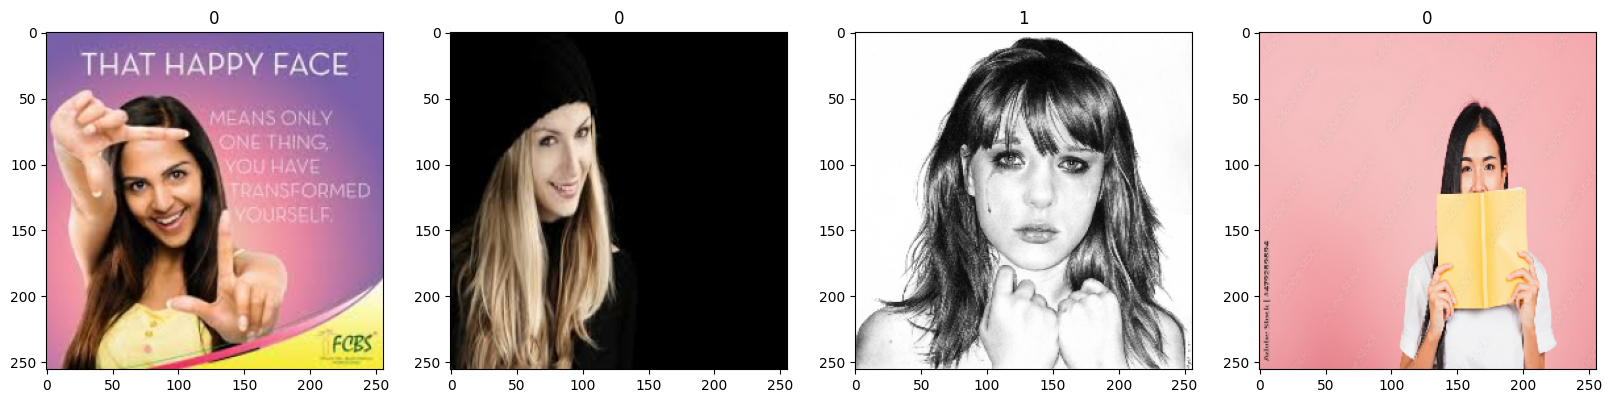

In [115]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [116]:
len(data) # we got 9  batches

9

In [122]:
train_size = int(len(data)*0.7)     # 6 -> training size 70%
val_size = int(len(data)*0.2)+1     # 2 
test_size = int(len(data)*0.1)+1    # 1

In [133]:
train = data.take(train_size)       # take first 6 batches
val = data.skip(train_size).take(val_size)      # skip first 6 batches then take 2 batches
test = data.skip(train_size+val_size).take(test_size)     # skip first ( 6 + 2) batches then takes 1 batch

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Dense,Flatten,Dropout

In [129]:
model = Sequential()

# block 
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))   # single Dense layer  # sigmoid for classification (0 or 1)

In [130]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [132]:
logdir='log'
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [136]:
history = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callbacks])

Epoch 1/20


6/6 [==============================] - 7s 953ms/step - loss: 0.6853 - accuracy: 0.4896 - val_loss: 0.6749 - val_accuracy: 0.7031
Epoch 2/20
6/6 [==============================] - 7s 1s/step - loss: 0.6605 - accuracy: 0.6146 - val_loss: 0.6202 - val_accuracy: 0.7969
Epoch 3/20
6/6 [==============================] - 7s 994ms/step - loss: 0.6361 - accuracy: 0.7760 - val_loss: 0.5411 - val_accuracy: 0.7969
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 0.6286 - accuracy: 0.6562 - val_loss: 0.6508 - val_accuracy: 0.5625
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 0.5734 - accuracy: 0.7448 - val_loss: 0.4958 - val_accuracy: 0.8438
Epoch 6/20
6/6 [==============================] - 7s 1s/step - loss: 0.5041 - accuracy: 0.7760 - val_loss: 0.4564 - val_accuracy: 0.7188
Epoch 7/20
6/6 [==============================] - 7s 1s/step - loss: 0.4933 - accuracy: 0.7448 - val_loss: 0.4727 - val_accuracy: 0.7500
Epoch 8/20
6/6 [==============================

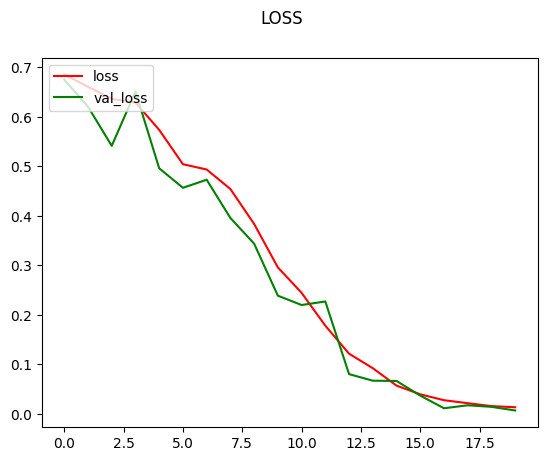

In [138]:
# history.history # loss and accuracy values with the help of this we plot accuracy and loss chart
fig =plt.figure()
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='green',label='val_loss')
plt.suptitle('LOSS')
plt.legend(loc='upper left')
plt.show()

# if loss is decreasing and validation loss is increassing then model is overfitting

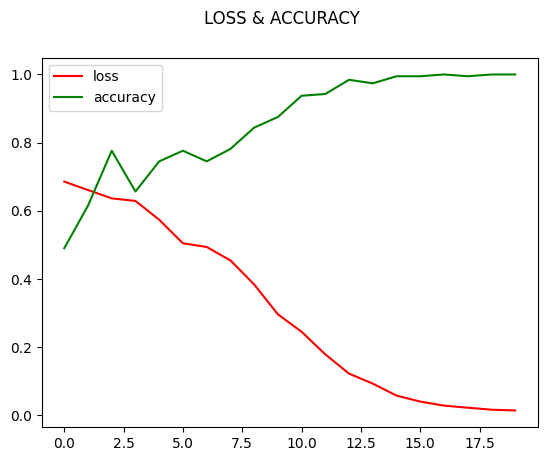

In [141]:
fig =plt.figure()
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['accuracy'],color='green',label='accuracy')
plt.suptitle('LOSS & ACCURACY')
plt.legend(loc='upper left')
plt.show()


In [142]:
# EVALUATE PERFORMANCE
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy


In [143]:
pre = Precision()
re = Recall()
ba = BinaryAccuracy()

In [144]:
for batch  in test.as_numpy_iterator():
    x,y = batch        # img , label
    pred = model.predict(x)
    pre.update_state(y,pred)
    re.update_state(y,pred)
    ba.update_state(y,pred)

1/1 [==============================] - 0s 163ms/step


In [148]:
print(f"Precision - {pre.result()} \nRecall - {re.result()} \nBinary Accuracy - {ba.result()}")

Precision - 1.0 
Recall - 1.0 
Binary Accuracy - 1.0


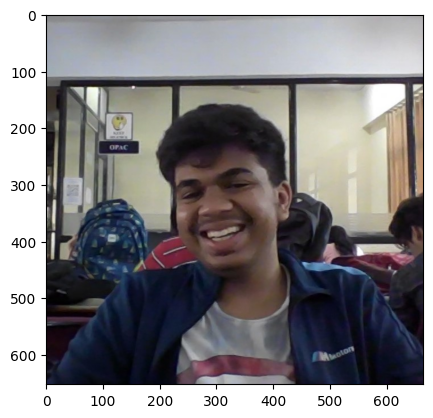

In [180]:
#testing on some photo
img  = cv2.imread("C:\\PYTHON_PROGRAMS\\DL\\dp_face_comparision\\faces\\train\\raj1.jpg")     # Happy Test
# img = cv2.imread("C:\\Users\\Janak\\Pictures\\Camera Roll\\WIN_20230806_20_30_24.jpg")    # Sad Test
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

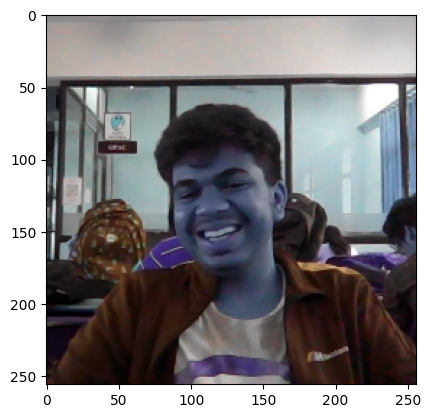

In [181]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [182]:
# dividing it by 255 to scale it
# add extra dimension (1,256,256,3) shape
pred = model.predict(np.expand_dims(resize/255,0))
if pred >0.5:
    print("SAD")
else:
    print("HAPPY")


1/1 [==============================] - 0s 40ms/step
HAPPY


In [184]:
from tensorflow.keras.models import load_model
model.save("happy_sad_detector.h5")

In [185]:
# loading the saved model
new_model = load_model("happy_sad_detector.h5")
new_model